In [244]:
with open("input.txt", "r") as file:
    data = file.read()
    data = data.splitlines()


In [245]:
example_data = [
    ".......S.......",
    "...............",
    ".......^.......",
    "...............",
    "......^.^......",
    "...............",
    ".....^.^.^.....",
    "...............",
    "....^.^...^....",
    "...............",
    "...^.^...^.^...",
    "...............",
    "..^...^.....^..",
    "...............",
    ".^.^.^.^.^...^.",
    "...............",
]


## Part 1

In [246]:

def count_splits(data) -> int:
    splits = []
    start = [i for i in range(len(data[0])) if data[0][i] == "S"][0] # Get starting ray
    rays = set() # Active rays, overlapping rays only stored once
    rays.add(start)
    get_idx_of_splits = lambda line: [i for i, elem in enumerate(line) if elem == "^"] # noqa: E731
    data = [line for line in data if line != "." * len(line)] # remove "empty" lines
    for line in data[1:]:
        split_idx = get_idx_of_splits(line) # Get indices of splits in this line
        intersection = rays.intersection(split_idx) # Find intersections with current rays
        if intersection: # If there are intersections
            splits.extend(intersection) # Add to splits
            for idx in intersection:
                rays.remove(idx) # Remove the hits
                # Add new rays to the left and right
                rays.add(idx - 1) 
                rays.add(idx + 1)
    return len(splits)

print(count_splits(data))




1537


## Part 2

In [249]:
def count_timelines(data) -> int:
    """ Counts the number of paths (timelines) to end states. (Plinko algorithm) """
    start = [i for i in range(len(data[0])) if data[0][i] == "S"][0]  # Get starting ray
    rays = set()  # Active rays, overlapping rays only stored once
    rays.add(start)
    get_idx_of_splits = lambda line: [i for i, elem in enumerate(line) if elem == "^"]  # noqa: E731
    data = [line for line in data if line != "." * len(line)]
    paths = [0] * len(data[0])  # Paths to each index
    paths[start] = 1  # One path to starting ray

    for line in data[1:]:
        split_idx = get_idx_of_splits(line)  # Get indexes of splits in this line
        intersection = rays.intersection(split_idx)  # Find intersections with current rays
        if intersection:  # If there are intersections (rays that split)
            for idx in intersection:
                
                # Update paths for new rays to the left and right
                paths[idx - 1] += paths[idx]
                paths[idx + 1] += paths[idx]
                paths[idx] = 0  # Clear paths at the split index
                # Add new rays to the left and right
                rays.add(idx - 1)
                rays.add(idx + 1)
                rays.remove(idx)  # Remove the ray that splits

    return sum(paths)
                

print(count_timelines(example_data)) # Should be 40
#print(count_timelines(data))

40


## Visualize the path map

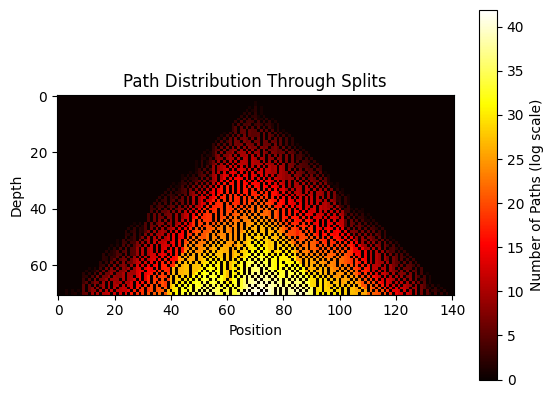

In [270]:
import matplotlib.pyplot as plt
import numpy as np
def plot_paths(data):
    start = [i for i in range(len(data[0])) if data[0][i] == "S"][0]  # Get starting ray
    rays = set()  # Active rays, overlapping rays only stored once
    rays.add(start)
    get_idx_of_splits = lambda line: [i for i, elem in enumerate(line) if elem == "^"]  # noqa: E731
    data = [line for line in data if line != "." * len(line)]
    paths = [0] * len(data[0])  # Paths to each index
    paths[start] = 1  # One path to starting ray

    path_history = []
    path_history.append(paths.copy())

    for line in data[1:]:
        split_idx = get_idx_of_splits(line)  # Get indexes of splits in this line
        intersection = rays.intersection(split_idx)  # Find intersections with current rays
        if intersection:  # If there are intersections (rays that split)
            for idx in intersection:
                
                # Update paths for new rays to the left and right
                paths[idx - 1] += paths[idx]
                paths[idx + 1] += paths[idx]
                paths[idx] = 0  # Clear paths at the split index
                # Add new rays to the left and right
                rays.add(idx - 1)
                rays.add(idx + 1)
                rays.remove(idx)  # Remove the ray that splits
        path_history.append(paths.copy())
    
    path_history = np.array(path_history)
    path_history[path_history == 0] = 1  # Avoid log(0) by setting 0s to 1s for visualization
    # to log scale
    path_history = np.log2(path_history)
    plt.imshow(path_history, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Number of Paths (log scale)')
    plt.xlabel('Position')
    plt.ylabel('Depth')
    plt.title('Path Distribution Through Splits')
    plt.show()
plot_paths(data)
